<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day_14_NER_spaCy_Transformers_Cleaned/notebooks/Day14_NER_spaCy_Transformers_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Day 14: Named Entity Recognition (NER)

In this notebook, we will explore **Named Entity Recognition (NER)** using two popular libraries:

- `spaCy` (rule-based and statistical models)
- `Hugging Face Transformers` (BERT-based model for fine-tuned NER)

We'll compare outputs and understand how both perform entity extraction tasks.

In [1]:
# 🛠️ Install Dependencies (uncomment if using Colab)
# !pip install spacy transformers
# !python -m spacy download en_core_web_sm

## ✨ NER with spaCy

In [2]:
import spacy

# Load spaCy English model
nlp_spacy = spacy.load("en_core_web_sm")

# Sample text
text = "Apple Inc. is looking at buying U.K. startup for $1 billion in 2025. Elon Musk tweeted from San Francisco."

# Process text
doc = nlp_spacy(text)

# Print named entities
for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}")

Apple Inc. -> ORG
U.K. -> GPE
$1 billion -> MONEY
2025 -> DATE
Elon Musk -> PERSON
San Francisco -> GPE


## 🤖 NER with Hugging Face Transformers (BERT)

In [3]:
from transformers import pipeline

# Load transformers NER pipeline
ner_pipe = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)

# Apply pipeline
results = ner_pipe(text)

# Display results
for entity in results:
    print(f"{entity['word']} ({entity['entity_group']}) - Score: {entity['score']:.2f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


Apple Inc (ORG) - Score: 1.00
U. K. (LOC) - Score: 1.00
El (PER) - Score: 0.79
##on Musk (PER) - Score: 0.84
San Francisco (LOC) - Score: 1.00


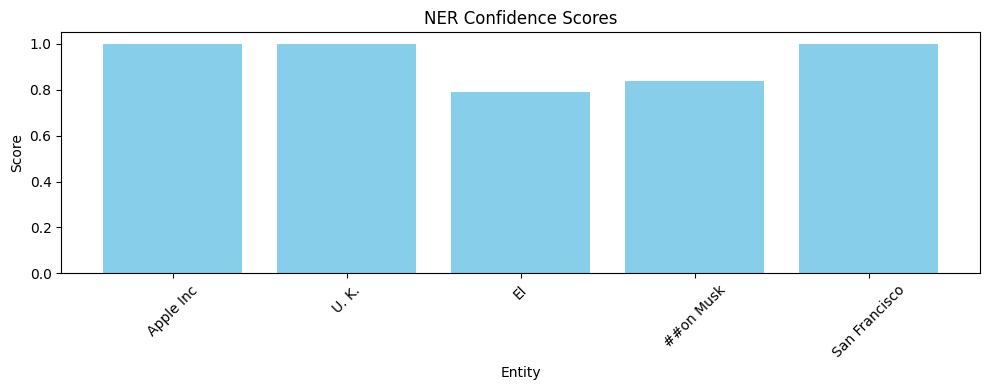

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame for visualization
df = pd.DataFrame(results)
df['score'] = df['score'].round(2)

# Plot scores
plt.figure(figsize=(10, 4))
plt.bar(df['word'], df['score'], color='skyblue')
plt.title("NER Confidence Scores")
plt.xlabel("Entity")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-32-6e50ae177afb>:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


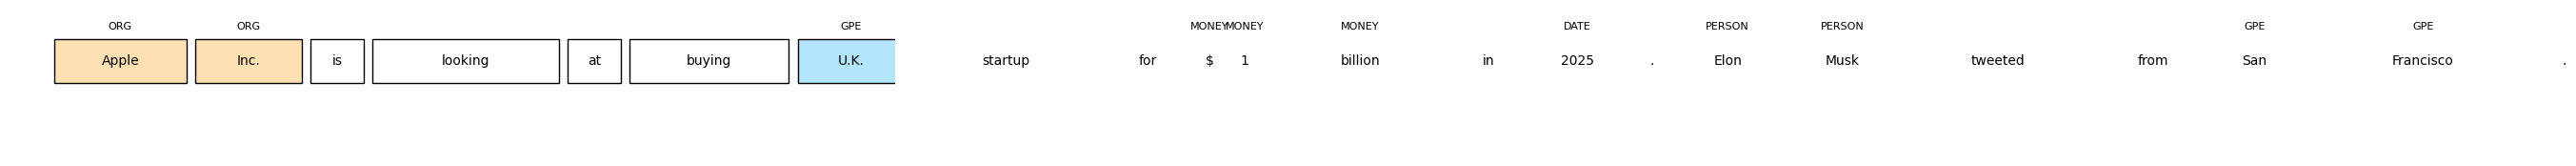

In [32]:
import spacy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load model and process text
nlp = spacy.load("en_core_web_sm")
text = "Apple Inc. is looking at buying U.K. startup for $1 billion in 2025. Elon Musk tweeted from San Francisco."
doc = nlp(text)

# Build token text list with entity labels
tokens = []
colors = {
    "ORG": "#ffe0b2",
    "GPE": "#b3e5fc",
    "MONEY": "#c8e6c9",
    "DATE": "#f8bbd0",
    "PERSON": "#d1c4e9"
}

for token in doc:
    label = next((ent.label_ for ent in doc.ents if token.idx >= ent.start_char and token.idx < ent.end_char), None)
    tokens.append((token.text, label))

# Plot using matplotlib
plt.figure(figsize=(12, 2))
ax = plt.gca()
x = 0.05
y = 0.5
for word, label in tokens:
    width = 0.03 * len(word)
    rect_color = colors.get(label, "white")
    ax.add_patch(Rectangle((x, y), width, 0.3, facecolor=rect_color, edgecolor='black'))
    plt.text(x + width/2, y + 0.15, word, ha='center', va='center', fontsize=10)
    if label:
        plt.text(x + width/2, y + 0.35, label, ha='center', va='bottom', fontsize=8, color='black')
    x += width + 0.01

plt.axis('off')
plt.tight_layout()
plt.savefig("ner_annotations_example.png", dpi=200)
plt.show()


Saved: model_eval_metrics.png


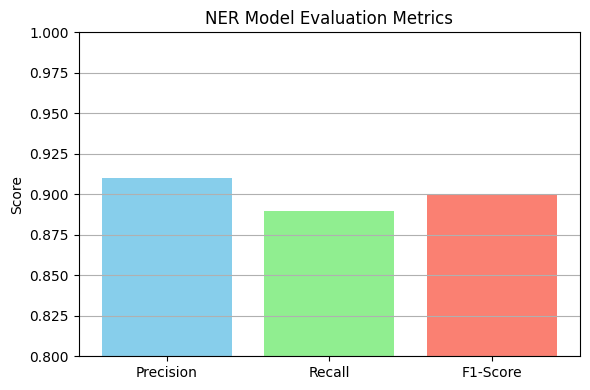

In [22]:
import matplotlib.pyplot as plt

# Example evaluation metrics
labels = ['Precision', 'Recall', 'F1-Score']
values = [0.91, 0.89, 0.90]

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0.8, 1.0)
plt.title("NER Model Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()

# Save as image
plt.savefig("model_eval_metrics.png")
print("Saved: model_eval_metrics.png")


## ✅ Summary
- spaCy is lightweight, fast, and easy to use for rule-based + statistical NER.
- Hugging Face Transformers provide high-accuracy NER with pre-trained transformer models.
- Use spaCy for lightweight tasks and HF Transformers for state-of-the-art applications.